# Book recommender system - Graphlab

The objective of this capstone project is to build a book recomendation system.
There are many tools in python for recomendation Systems. I will be utilizing Graphlab, https://turi.com/learn/userguide/ to build a hybrid recommendation system.

There are usually two methods to build recomendtion systems.Collaborative and Content filtering approach.
Collaborative filtering: relies on the users collaborating to rate an item/product and will only be able to recommend an item if the user is already in the database and his/her preferences/ratings are recorded in the system. similarly a new item in content based approach would not have a rating and thus the system would not be able to make recommendations.

the alternative approach is to use a mix of the two approaches to build a recommendation system that selects the best method to recommend when information is not availiable from the other systems. Turi’s GraphLab Create provides a recommender toolkit that combines ease of use and flexibility. It contains state-of-the-art recommender models such as:

Factorization machine
Matrix factorization
Item similarity (also known as neighborhood-based collaborative filtering)
Popularity-based recommender

The dataset used is Amazon books review database, obtained from http://jmcauley.ucsd.edu/data/amazon/ with permission from the authors of "Image-based recommendations on styles and substitutes" J. McAuley, C. Targett, J. Shi, A. van den Hengel SIGIR, 2015.


In [150]:
import graphlab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#small dataset 100,000 reviews
reviews=graphlab.SFrame.read_csv("hundredKreviews.csv")

In [6]:
reviews.head(2)

Columns:
	X1	int
	reviewerID	str
	asin	str
	reviewerName	str
	helpful	array
	unixReviewTime	int
	reviewText	str
	overall	float
	reviewTime	str
	summary	str

Rows: 2

Data:
+----+-----------------------+------------+-------------------------------+
| X1 |       reviewerID      |    asin    |          reviewerName         |
+----+-----------------------+------------+-------------------------------+
| 0  | A10000012B7CGYKOMPQ4L | 000100039X |              Adam             |
| 1  |     A2S166WSCFIFP5    | 000100039X | adead_poet@hotmail.com "ad... |
+----+-----------------------+------------+-------------------------------+
+------------+----------------+-------------------------------+---------+
|  helpful   | unixReviewTime |           reviewText          | overall |
+------------+----------------+-------------------------------+---------+
| [0.0, 0.0] |   1355616000   | Spiritually and mentally i... |   5.0   |
| [0.0, 2.0] |   1071100800   | This is one my must have b... |   5.0   |
+------------+----------------+-------------------------------+---------+
+-------------+--------------+
|  reviewTime |   summary    |
+-------------+--------------+
| 12 16, 2012 |  Wonderful!  |
| 12 11, 2003 | close to god |
+-------------+--------------+
[2 rows x 10 columns]

In [7]:
reviews.show()

Canvas is accessible via web browser at the URL: http://localhost:53821/index.html
Opening Canvas in default web browser.


In [9]:
booksdb=pd.read_csv("booksinfo.csv")

/Users/freh_mac/anaconda/envs/gl-env/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [113]:
booksdb.head(7)

asin,title,description,brand
0001048791,"The Crucible: Performedby Stuart Pankin, Jerome ...",,
0001048775,Measure for Measure:Complete &amp; Unabri ...,William Shakespeare iswidely regarded as the ...,
0001048236,The Sherlock Holmes AudioCollection ...,"&#34;One thing iscertain, Sherlockians, ...",
0000401048,The rogue of publishers'row;: Confessions of a ...,,
0001019880,Classic Soul Winner's NewTestament Bible ...,,
0001048813,Archer Christmas 4 TapePack ...,,
0001148427,Sonatas - For Piano,,


In [12]:
booksdb=booksdb.drop(["Unnamed: 0","categories","imUrl","related","salesRank","price"],axis=1)
booksdb.fillna(" ", inplace=True)
booksdb=graphlab.SFrame(booksdb)

In [94]:
reviews.shape

(99985, 10)

In [96]:
booksdb.shape

(2370585, 4)

In [32]:
reviews.show()

Canvas is accessible via web browser at the URL: http://localhost:53821/index.html
Opening Canvas in default web browser.


In [13]:
reviews=reviews.join(booksdb,on='asin',how='inner')

In [31]:
reviews.head(0)

Columns:
	X1	int
	reviewerID	str
	asin	str
	reviewerName	str
	helpful	array
	unixReviewTime	int
	reviewText	str
	overall	float
	reviewTime	str
	summary	str
	title	str
	description	str
	brand	str

Rows: 0

Data:
	[]

# Build a recommender

In [27]:
model = graphlab.recommender.create(reviews, user_id='reviewerID', item_id='title')

Recsys training: model = item_similarity

Warning: Ignoring columns X1, asin, reviewerName, helpful, unixReviewTime, reviewText, overall, reviewTime, summary, description, brand;

To use one of these as a target column, set target = <column_name>

and use a method that allows the use of a target.

Preparing data set.

Data has 99985 observations with 68123 users and 2637 items.

Data prepared in: 0.693453s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 14.189ms                       | 17.5       |

| 30.705ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 59.48ms                             | 0                | 0               |

| 136.043ms                           | 100              | 2637            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.167996s

In [28]:
similar_items=model.get_similar_items()
similar_items.head(10)

title,similar,score,rank
Master Georgie,Breakfast on Pluto,0.0571428537369,1
Master Georgie,BRIXTON BEACH,0.0454545617104,2
Master Georgie,Arcadia,0.0454545617104,3
Master Georgie,Inventing Memory: A Novelof Mothers and Daughters ...,0.0434782505035,4
Master Georgie,N. C. Wyeth: A Biography,0.0434782505035,5
Master Georgie,Fanny: A Fiction,0.0400000214577,6
Master Georgie,Without Reservation: TheMaking of America's Most ...,0.0400000214577,7
Master Georgie,Catholics,0.0400000214577,8
Master Georgie,Andrew Wyeth: A SecretLife ...,0.0384615659714,9
Master Georgie,The Cloud Sketcher,0.0384615659714,10


In [29]:
similar_items.print_rows (50,4)

+-------------------------------+--------------------------------+
|             title             |            similar             |
+-------------------------------+--------------------------------+
|         Master Georgie        |       Breakfast on Pluto       |
|         Master Georgie        |         BRIXTON BEACH          |
|         Master Georgie        |            Arcadia             |
|         Master Georgie        | Inventing Memory: A Novel ...  |
|         Master Georgie        |    N. C. Wyeth: A Biography    |
|         Master Georgie        |        Fanny: A Fiction        |
|         Master Georgie        | Without Reservation: The M...  |
|         Master Georgie        |           Catholics            |
|         Master Georgie        |  Andrew Wyeth: A Secret Life   |
|         Master Georgie        |       The Cloud Sketcher       |
| The Greatest Book on &quot... |     The Book of Revelation     |
| The Berenstains' B Book (B... | Happy Haunting, Amelia Bed..

In [127]:
#Similarity graph from my preference to others
similarity_graph=graphlab.SGraph().add_edges(similar_items,src_field='title',dst_field='similar')
similarity_graph.summary()

{'num_edges': 23102, 'num_vertices': 2595}

In [128]:
shortestpath=graphlab.shortest_path.create(similarity_graph,"The Prophet")

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2467                       |

| 2155                       |

| 243                        |

| 16                         |

| 0                          |

+----------------------------+

In [132]:
shortestpath.get_path('Deafening')

[('The Prophet', 0.0),
 ('A Farewell to Arms (A Scribner Classic)', 1.0),
 ('The Bridge of San Luis Rey (Perennial Classics)', 2.0),
 ('Deafening', 3.0)]

# Item Similarity Recomender (Collaborative  Filtering algorithm)

This model first computes the similarity between items using the observations of users who have interacted with both items. Given a similarity between item ii and jj, S(i,j)S(i,j), it scores an item jj for user uu using a weighted average of the user’s previous observations IuIu.

There are three choices of similarity metrics to use: ‘jaccard’, ‘cosine’ and ‘pearson’.

In [204]:
modelbase=graphlab.recommender.item_similarity_recommender.create(reviews,user_id="reviewerID",item_id="asin",target="overall")
print 'Training RMSE', modelbase.get("training_rmse")
print 'Test RMSE', graphlab.evaluation.rmse(test['overall'],modelbase.predict(test))

Recsys training: model = item_similarity

Warning: Ignoring columns X1, reviewerName, helpful, unixReviewTime, reviewText, reviewTime, summary, title, description, brand;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 99985 observations with 68123 users and 2641 items.

Data prepared in: 0.325704s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 2.082ms                        | 39.5       |

| 31.277ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 55.979ms                            | 0                | 0               |

| 151.203ms                           | 100              | 2641            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.175995s

Training RMSE None
Test RMSE 4.3320616433


# Matrix Factorization - to predict the next rating
A FactorizationRecommender learns latent factors for each user and item and uses them to make rating predictions.

FactorizationRecommender [Koren_et_al] contains a number of options that tailor to a variety of datasets and evaluation metrics, making this one of the most powerful model in the GraphLab Create recommender toolkit.

Side information

Side features may be provided via the user_data and item_data options when the model is created.

Additionally, observation-specific information, such as the time of day when the user rated the item, can also be included. Any column in the observation_data SFrame that is not the user id, item id, or target is treated as a observation side features. The same side feature columns must be present when calling predict().

In [17]:
train,test = reviews.random_split(0.9)

# side_data_factorization=True

In [35]:
#Build a matrix factorization recommender to predict star rating:
model1=graphlab.factorization_recommender.create(train,target='overall',side_data_factorization=True, item_id="title",user_id='reviewerID')

#compute train and test accuracy:
print 'Training RMSE', model1.get("training_rmse")
print 'Test RMSE', graphlab.evaluation.rmse(test['overall'],model1.predict(test))

Recsys training: model = factorization_recommender

Preparing data set.

Data has 89898 observations with 62708 users and 2637 items.

Data prepared in: 1.14626s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 8        |

| regularization                 | L2 Regularization on Factors                     | 1e-08    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-10    |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 11237 / 89898 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 4.16667           | Not Viable                               |

| 1       | 1.04167           | Not Viable                               |

| 2       | 0.260417          | Not Viable                               |

| 3       | 0.0651042         | 0.856775                                 |

| 4       | 0.0325521         | 0.257151                                 |

| 5       | 0.016276          | 0.615966                                 |

+---------+-------------------+------------------------------------------+

| Final   | 0.0325521         | 0.257151                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 105us        | 1.25383           | 1.11975               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 230.561ms    | 1.34484           | 1.15966               | 0.0325521   |

| 2       | 434.144ms    | 0.709398          | 0.842239              | 0.0325521   |

| 3       | 560.287ms    | 0.596577          | 0.772362              | 0.0325521   |

| 4       | 708.159ms    | 0.63435           | 0.796439              | 0.0325521   |

| 5       | 851.401ms    | 0.797993          | 0.893284              | 0.0325521   |

| 6       | 1.04s        | 0.93987           | 0.96945               | 0.0325521   |

| 10      | 1.60s        | 1.17651           | 1.08465               | 0.0325521   |

| 11      | 1.75s        | 0.621428          | 0.788282              | 0.0325521   |

| 20      | 3.00s        | 2.12327           | 1.45713               | 0.0325521   |

| 21      | 3.19s        | DIVERGED          | DIVERGED              | 0.0325521   |

| RESET   | 3.27s        | 1.25373           | 1.1197                |             |

| 2       | 3.61s        | DIVERGED          | DIVERGED              | 0.016276    |

| RESET   | 3.70s        | 1.25364           | 1.11966               |             |

| 7       | 4.67s        | 0.958336          | 0.978945              | 0.00813802  |

| 17      | 6.11s        | 0.875383          | 0.935617              | 0.00813802  |

| 27      | 7.47s        | 0.814225          | 0.902342              | 0.00813802  |

| 30      | 7.88s        | 0.830788          | 0.911474              | 0.00813802  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached (hard limit).

Computing final objective value and training RMSE.

Final objective value: 0.862404

Final training RMSE: 0.928655

Training RMSE 0.92865437183
Test RMSE 1.08105087372


# side_data_factorization=False

In [36]:
#Build a matrix factorization recommender to predict star rating:
model0=graphlab.factorization_recommender.create(train,target='overall',side_data_factorization=False,item_id="title",user_id="reviewerID")

#compute train and test accuracy:
print 'Training RMSE', model0.get("training_rmse")
print 'Test RMSE', graphlab.evaluation.rmse(test['overall'],model0.predict(test))


Recsys training: model = factorization_recommender

Preparing data set.

Data has 89898 observations with 62708 users and 2637 items.

Data prepared in: 1.1498s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 8        |

| regularization                 | L2 Regularization on Factors                     | 1e-08    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-10    |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 11237 / 89898 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 4.16667           | Not Viable                               |

| 1       | 1.04167           | Not Viable                               |

| 2       | 0.260417          | Not Viable                               |

| 3       | 0.0651042         | 0.162012                                 |

| 4       | 0.0325521         | 0.332302                                 |

+---------+-------------------+------------------------------------------+

| Final   | 0.0651042         | 0.162012                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 120us        | 1.25388           | 1.11977               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 156.146ms    | DIVERGED          | DIVERGED              | 0.0651042   |

| RESET   | 233.233ms    | 1.25374           | 1.11971               |             |

| 1       | 351.459ms    | 1.69443           | 1.30169               | 0.0325521   |

| 2       | 443.121ms    | 0.997121          | 0.998553              | 0.0193556   |

| 3       | 556.567ms    | 0.648326          | 0.805184              | 0.0142803   |

| 4       | 636.652ms    | 0.676675          | 0.822602              | 0.00967779  |

| 5       | 770.427ms    | 0.663871          | 0.814782              | 0.00688393  |

| 6       | 893.522ms    | 0.522443          | 0.722802              | 0.00504885  |

| 9       | 1.14s        | 0.330768          | 0.575124              | 0.00313233  |

| 11      | 1.34s        | 0.379928          | 0.616382              | 0.00190541  |

| 19      | 2.07s        | 0.17875           | 0.422787              | 0.000316161 |

| 29      | 3.19s        | 0.173577          | 0.416625              | 4.84014e-05 |

| 39      | 4.59s        | 0.171996          | 0.414723              | 9.68942e-06 |

| 49      | 5.73s        | 0.171645          | 0.414299              | 2.42743e-06 |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.171596

Final training RMSE: 0.414241

Training RMSE 0.414240808284
Test RMSE 1.10327835177


The fatorization recommender model with side_data_factorization=False model overfits with the training data as it yields a low RMSE on training but does worse on the testing data.

# Recommendations from the first model

In [37]:
model1_recomm = model1.recommend(users=range(1),k=5)
model1_recomm.print_rows(num_rows=25)

+------------+-------------------------------+---------------+------+
| reviewerID |             title             |     score     | rank |
+------------+-------------------------------+---------------+------+
|     0      |            Unbroken           | 4.51763565727 |  1   |
|     0      |     The Forgotten Soldier     | 4.43523028381 |  2   |
|     0      | The Lion, the Witch, and t... | 4.42126640566 |  3   |
|     0      | Charlotte's Web Collector'... | 4.41272093244 |  4   |
|     0      | Where the Sidewalk Ends: P... | 4.40225711353 |  5   |
+------------+-------------------------------+---------------+------+
[5 rows x 4 columns]



In [38]:
similarItems=model1.get_similar_items()
similarItems.print_rows (50,4)

+-------------------------------+-------------------------------+----------------+
|             title             |            similar            |     score      |
+-------------------------------+-------------------------------+----------------+
|         Master Georgie        |     Nathan's Run: A Novel     | 0.998048126698 |
|         Master Georgie        | Complete Idiot's Guide to ... | 0.997465908527 |
|         Master Georgie        | The View from the Center o... | 0.997170865536 |
|         Master Georgie        | Juran on Quality by Design... | 0.99716514349  |
|         Master Georgie        | In the Night Kitchen (Cald... | 0.995946824551 |
|         Master Georgie        |      Bread Alone: A Novel     | 0.995155036449 |
|         Master Georgie        | What We Ache For: Creativi... | 0.99403065443  |
|         Master Georgie        |           Wolf Rider          | 0.994011640549 |
|         Master Georgie        | The Heart of Islam: Enduri... | 0.994000077248 |
|   

In [60]:
k=similarItems["title"].unique()

In [140]:
similarItems0=model0.get_similar_items()
similarItems0.print_rows (70,4)

+-------------------------------+--------------------------------+
|             title             |            similar             |
+-------------------------------+--------------------------------+
|         Master Georgie        | The Vandal's Crown: How Re...  |
|         Master Georgie        | A Mulligan for Bobby Jobe:...  |
|         Master Georgie        |       Sondheim &amp; Co        |
|         Master Georgie        | Happy Haunting, Amelia Bed...  |
|         Master Georgie        | Eamon De Valera: The Man W...  |
|         Master Georgie        | Death of the Party (Death ...  |
|         Master Georgie        |     Inside the Soviet Army     |
|         Master Georgie        |        The SILVER CROWN        |
|         Master Georgie        |         The Wise Woman         |
|         Master Georgie        |     The Wedding Cake Book      |
| The Greatest Book on &quot... | Slaying the Dragon: How to...  |
| The Greatest Book on &quot... | The September 11 Photo Proje

# get similar items from the factorization model

In [75]:
similarbook=model1.get_similar_items(["The Prophet"])
similarbook.print_rows (50,4)

+-------------+-------------------------------+----------------+------+
|    title    |            similar            |     score      | rank |
+-------------+-------------------------------+----------------+------+
| The Prophet | The Complete Idiot's Guide... | 0.998492062092 |  1   |
| The Prophet | Why Am I Afraid to Tell Yo... | 0.990117847919 |  2   |
| The Prophet |   Girl With A Pearl Earring   | 0.987874507904 |  3   |
| The Prophet |     The Book of Revelation    | 0.984177172184 |  4   |
| The Prophet |        The Sea Sisters        | 0.98360902071  |  5   |
| The Prophet | The Flashman: from the Fla... | 0.982960343361 |  6   |
| The Prophet |     The Lord of the Rings     | 0.981990873814 |  7   |
| The Prophet | Seabiscuit: The True Story... | 0.981899559498 |  8   |
| The Prophet | Cables from Kabul: The Ins... | 0.98143607378  |  9   |
| The Prophet | Chuang-Tzu:  The Inner Cha... | 0.979669928551 |  10  |
+-------------+-------------------------------+----------------+

In [130]:
view = model1.views.explore(item_data=reviews,item_name_column='title')
view.show()

Warning: The model was fit with 2 feature columns but only 1 were present during transform(). Proceeding with transform by ignoring the missing columns.

Warning: The model was fit with 2 feature columns but only 1 were present during transform(). Proceeding with transform by ignoring the missing columns.

View object

URI: 		http://localhost:32212/view/3905c8cc-95a7-462f-8279-2a4940faa00d
HTML: 		
<gl-recommender-explore
    uri="http://localhost:32212/view/a02c16ee-f2a9-449f-ac39-932545823fa4"
    api_key=""
/>
        

In [142]:
# Create a new model, using the larger dataset, with the tuned parameters
m = graphlab.ranking_factorization_recommender.create(reviews, 'reviewerID', 'title', 'overall', side_data_factorization=True,
                                                max_iterations=50, num_factors=5,
                                                regularization=0.00001)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 99985 observations with 68123 users and 2637 items.

Data prepared in: 1.62325s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 5        |

| regularization                 | L2 Regularization on Factors                     | 1e-05    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 12498 / 99985 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 4.16667           | Not Viable                               |

| 1       | 1.04167           | Not Viable                               |

| 2       | 0.260417          | Not Viable                               |

| 3       | 0.0651042         | 1.08748                                  |

| 4       | 0.0325521         | 1.07143                                  |

| 5       | 0.016276          | 1.50908                                  |

| 6       | 0.00813802        | 1.66868                                  |

| 7       | 0.00406901        | 1.8854                                   |

+---------+-------------------+------------------------------------------+

| Final   | 0.0325521         | 1.07143                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 87us         | 2.46435           | 1.1211                |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 768.693ms    | DIVERGED          | DIVERGED              | 0.0325521   |

| RESET   | 1.02s        | 2.46419           | 1.12106               |             |

| 1       | 1.80s        | 2.23635           | 1.21725               | 0.016276    |

| 2       | 2.47s        | 1.73945           | 1.04405               | 0.016276    |

| 3       | 3.05s        | 1.6164            | 1.01365               | 0.016276    |

| 4       | 3.54s        | 1.57154           | 1.00418               | 0.016276    |

| 5       | 4.03s        | 1.48596           | 0.966118              | 0.016276    |

| 6       | 4.52s        | 1.43396           | 0.945874              | 0.016276    |

| 9       | 5.97s        | 1.42695           | 0.934212              | 0.016276    |

| 11      | 6.94s        | 1.33815           | 0.907418              | 0.016276    |

| 14      | 8.37s        | 1.27343           | 0.87623               | 0.016276    |

| 19      | 11.35s       | 1.68542           | 0.999893              | 0.016276    |

| 24      | 13.76s       | 1.18756           | 0.828685              | 0.016276    |

| 29      | 16.14s       | 1.21952           | 0.854907              | 0.016276    |

| 34      | 18.48s       | 1.15813           | 0.826871              | 0.016276    |

| 39      | 20.82s       | 1.46294           | 0.848848              | 0.016276    |

| 44      | 23.20s       | 1.43729           | 0.926193              | 0.016276    |

| 49      | 25.56s       | 1.0728            | 0.780521              | 0.016276    |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 1.04853

Final training RMSE: 0.761915

In [143]:
similar=m.get_similar_items()
similar.print_rows(70,4)

+-------------------------------+--------------------------------+
|             title             |            similar             |
+-------------------------------+--------------------------------+
|         Master Georgie        | Teach Yourself French in 2...  |
|         Master Georgie        |     House on Willow Street     |
|         Master Georgie        | The Old Man and the Sea (A...  |
|         Master Georgie        |         Bet Your Life          |
|         Master Georgie        |   Her Scandalous Intentions    |
|         Master Georgie        |   Real Analysis, 3rd Edition   |
|         Master Georgie        | Yeat's Ghosts: The Secret ...  |
|         Master Georgie        |           The Matrix           |
|         Master Georgie        |         I Heart Paris          |
|         Master Georgie        | The Body in the Snowdrift:...  |
| The Greatest Book on &quot... |      Elements of Grammar       |
| The Greatest Book on &quot... |     November of the Heart   

# Improving Predictive Accuracy

In [148]:
regularization_vals = [0.001, 0.0001, 0.00001, 0.000001]
models = [graphlab.factorization_recommender.create(train, 'reviewerID', 'title', 'overall',side_data_factorization=True,
                                              max_iterations=50, num_factors=5, regularization=r)
          for r in regularization_vals]

Recsys training: model = factorization_recommender

Preparing data set.

Data has 89898 observations with 62708 users and 2637 items.

Data prepared in: 1.21054s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 5        |

| regularization                 | L2 Regularization on Factors                     | 0.001    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-10    |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 11237 / 89898 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 0.81929           | Not Viable                               |

| 1       | 0.204823          | Not Viable                               |

| 2       | 0.0512056         | 0.520019                                 |

| 3       | 0.0256028         | 0.673384                                 |

| 4       | 0.0128014         | 0.992994                                 |

| 5       | 0.0064007         | 1.16111                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0512056         | 0.520019                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 117us        | 1.25383           | 1.11975               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 214.117ms    | 1.55921           | 1.04526               | 0.0512056   |

| 2       | 411.275ms    | 0.783929          | 0.857107              | 0.0512056   |

| 3       | 617.617ms    | 0.662212          | 0.798846              | 0.0512056   |

| 4       | 805.775ms    | 0.590759          | 0.754074              | 0.0512056   |

| 5       | 1.01s        | 0.553197          | 0.730391              | 0.0512056   |

| 6       | 1.21s        | 0.524861          | 0.712939              | 0.0512056   |

| 10      | 2.00s        | 0.447239          | 0.663364              | 0.0512056   |

| 11      | 2.21s        | 0.43349           | 0.654248              | 0.0512056   |

| 15      | 3.04s        | 0.387416          | 0.620809              | 0.0512056   |

| 20      | 4.00s        | 0.344377          | 0.586209              | 0.0512056   |

| 25      | 4.96s        | 0.309162          | 0.55577               | 0.0512056   |

| 30      | 6.31s        | 0.279528          | 0.528499              | 0.0512056   |

| 35      | 7.38s        | 0.254794          | 0.504475              | 0.0512056   |

| 40      | 8.31s        | 0.233113          | 0.482475              | 0.0512056   |

| 45      | 9.59s        | 0.214583          | 0.462766              | 0.0512056   |

| 50      | 10.68s       | 0.197928          | 0.444524              | 0.0512056   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.193531

Final training RMSE: 0.43955

Recsys training: model = factorization_recommender

Preparing data set.

Data has 89898 observations with 62708 users and 2637 items.

Data prepared in: 1.46149s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 5        |

| regularization                 | L2 Regularization on Factors                     | 0.0001   |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-10    |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 11237 / 89898 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 4.16667           | Not Viable                               |

| 1       | 1.04167           | Not Viable                               |

| 2       | 0.260417          | Not Viable                               |

| 3       | 0.0651042         | 0.38876                                  |

| 4       | 0.0325521         | Not Viable                               |

| 5       | 0.00813802        | No Decrease (1.2854 >= 1.26352)          |

| 6       | 0.00203451        | 1.18768                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0651042         | 0.38876                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 138us        | 1.25388           | 1.11977               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 269.193ms    | DIVERGED          | DIVERGED              | 0.0651042   |

| RESET   | 419.42ms     | 1.25365           | 1.11966               |             |

| 1       | 753.849ms    | 1.24143           | 1.04887               | 0.0325521   |

| 2       | 1.05s        | 1.20081           | 1.01057               | 0.0325521   |

| 3       | 1.36s        | 0.898959          | 0.842419              | 0.0325521   |

| 4       | 1.69s        | 0.897117          | 0.837899              | 0.0325521   |

| 5       | 1.98s        | 2.66163           | 1.5693                | 0.0325521   |

| 6       | 2.19s        | 0.768686          | 0.753761              | 0.0325521   |

| 9       | 2.90s        | 0.761286          | 0.747276              | 0.0325521   |

| 11      | 3.61s        | 0.726864          | 0.723265              | 0.0325521   |

| 13      | 4.37s        | DIVERGED          | DIVERGED              | 0.0325521   |

| RESET   | 4.46s        | 1.25359           | 1.11964               |             |

| 1       | 4.85s        | 1.41239           | 1.1699                | 0.016276    |

| 6       | 6.50s        | 1.04457           | 0.994164              | 0.016276    |

| 11      | 8.02s        | 0.855365          | 0.891178              | 0.016276    |

| 16      | 9.65s        | 0.782579          | 0.847491              | 0.016276    |

| 21      | 11.28s       | 0.876793          | 0.900052              | 0.016276    |

| 26      | 12.69s       | 0.884725          | 0.903415              | 0.016276    |

| 31      | 13.82s       | 0.739987          | 0.818666              | 0.016276    |

| 36      | 14.75s       | 0.721501          | 0.806737              | 0.016276    |

| 39      | 15.56s       | 1.12634           | 1.02723               | 0.016276    |

| 41      | 16.16s       | 0.744937          | 0.820671              | 0.016276    |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached (hard limit).

Computing final objective value and training RMSE.

Final objective value: 0.721299

Final training RMSE: 0.80614

Recsys training: model = factorization_recommender

Preparing data set.

Data has 89898 observations with 62708 users and 2637 items.

Data prepared in: 1.41548s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 5        |

| regularization                 | L2 Regularization on Factors                     | 1e-05    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-10    |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 11237 / 89898 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 4.16667           | Not Viable                               |

| 1       | 1.04167           | Not Viable                               |

| 2       | 0.260417          | Not Viable                               |

| 3       | 0.0651042         | 0.35526                                  |

| 4       | 0.0325521         | 0.547317                                 |

| 5       | 0.016276          | 0.785554                                 |

+---------+-------------------+------------------------------------------+

| Final   | 0.0651042         | 0.35526                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 145us        | 1.2539            | 1.11978               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 314.458ms    | 5.61893           | 2.35637               | 0.0651042   |

| 2       | 545.158ms    | 0.604456          | 0.733546              | 0.0651042   |

| 3       | 730.198ms    | 0.555549          | 0.699405              | 0.0651042   |

| 4       | 1.02s        | 0.532876          | 0.682987              | 0.0651042   |

| 5       | 1.33s        | 0.517098          | 0.671318              | 0.0651042   |

| 6       | 1.64s        | 0.504193          | 0.661616              | 0.0651042   |

| 10      | 2.77s        | 0.474621          | 0.6388                | 0.0651042   |

| 11      | 2.98s        | 0.466609          | 0.632475              | 0.0651042   |

| 15      | 3.85s        | 0.466203          | 0.632055              | 0.0651042   |

| 20      | 4.84s        | 0.44844           | 0.617711              | 0.0651042   |

| 25      | 5.78s        | 0.427407          | 0.600332              | 0.0651042   |

| 30      | 6.83s        | 0.518679          | 0.672022              | 0.0651042   |

| 35      | 8.39s        | 1.1989            | 1.06388               | 0.0651042   |

| 37      | 8.94s        | DIVERGED          | DIVERGED              | 0.0651042   |

| RESET   | 9.10s        | 1.25367           | 1.11967               |             |

| 3       | 9.96s        | 2.15893           | 1.46285               | 0.0325521   |

| 5       | 10.54s       | DIVERGED          | DIVERGED              | 0.0325521   |

| RESET   | 10.64s       | 1.25368           | 1.11968               |             |

| 3       | 11.52s       | 0.943199          | 0.968506              | 0.016276    |

| 8       | 12.69s       | 0.918335          | 0.955275              | 0.016276    |

| 11      | 13.27s       | 0.857689          | 0.922817              | 0.016276    |

| 13      | 13.67s       | 0.832943          | 0.9092                | 0.016276    |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached (hard limit).

Computing final objective value and training RMSE.

Final objective value: 0.827679

Final training RMSE: 0.906301

Recsys training: model = factorization_recommender

Preparing data set.

Data has 89898 observations with 62708 users and 2637 items.

Data prepared in: 2.01139s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 5        |

| regularization                 | L2 Regularization on Factors                     | 1e-06    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-10    |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 11237 / 89898 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 4.16667           | Not Viable                               |

| 1       | 1.04167           | Not Viable                               |

| 2       | 0.260417          | 0.598419                                 |

| 3       | 0.130208          | 0.249576                                 |

| 4       | 0.0651042         | 0.102347                                 |

| 5       | 0.0325521         | 0.531588                                 |

+---------+-------------------+------------------------------------------+

| Final   | 0.0651042         | 0.102347                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 117us        | 1.25384           | 1.11975               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 415.719ms    | 4.99325           | 2.23306               | 0.0651042   |

| 2       | 626.067ms    | 0.631597          | 0.790517              | 0.0651042   |

| 3       | 945.027ms    | 0.569438          | 0.750175              | 0.0651042   |

| 4       | 1.25s        | 0.54088           | 0.730893              | 0.0651042   |

| 5       | 1.53s        | 0.524373          | 0.71951               | 0.0651042   |

| 6       | 1.83s        | 0.508069          | 0.708088              | 0.0651042   |

| 10      | 2.99s        | 0.466175          | 0.67785               | 0.0651042   |

| 11      | 3.20s        | 0.462506          | 0.675135              | 0.0651042   |

| 15      | 4.10s        | 0.455401          | 0.669842              | 0.0651042   |

| 20      | 5.33s        | 0.444244          | 0.661445              | 0.0651042   |

| 25      | 6.90s        | 0.43055           | 0.650993              | 0.0651042   |

| 30      | 8.67s        | 0.366234          | 0.599542              | 0.0651042   |

| 35      | 9.95s        | 0.619554          | 0.782777              | 0.0651042   |

| 40      | 11.13s       | 0.805111          | 0.893459              | 0.0651042   |

| 45      | 12.30s       | 1.41622           | 1.18716               | 0.0651042   |

| 50      | 13.38s       | 0.647207          | 0.800193              | 0.0651042   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.783335

Final training RMSE: 0.881157

In [154]:
(rmse_train, rmse_test) = ([], [])
for m in models:
    rmse_train.append(m['training_rmse'])
    rmse_test.append(graphlab.evaluation.rmse(test['overall'], m.predict(test)))

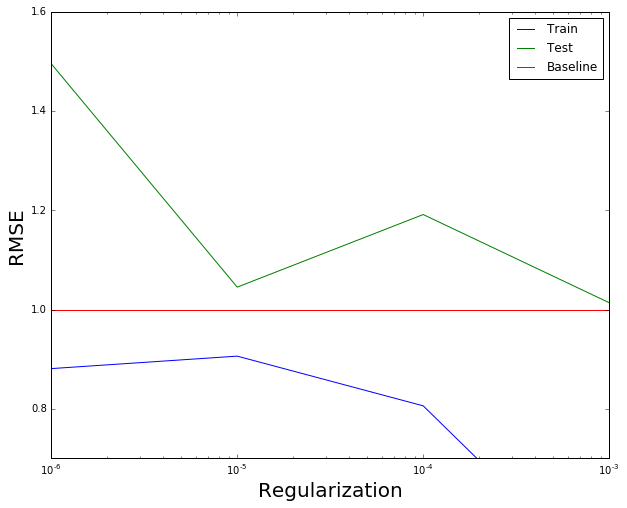

In [161]:
(fig, ax) = plt.subplots(figsize=(10, 8))
[p1, p2, p3] = ax.semilogx(regularization_vals, rmse_train, 
                           regularization_vals, rmse_test, 
                           regularization_vals, len(regularization_vals) * [1]
                           )
ax.set_ylim([0.7, 1.6])
ax.set_xlabel('Regularization', fontsize=20)
ax.set_ylabel('RMSE', fontsize=20)
ax.legend([p1, p2, p3], ["Train", "Test", "Baseline"])

In [147]:
regularization_vals = [0.001, 0.0001, 0.00001, 0.000001]
models2 = [graphlab.ranking_factorization_recommender.create(train, 'reviewerID', 'title', 'overall',side_data_factorization=True,
                                              max_iterations=50, num_factors=5, regularization=r)
          for r in regularization_vals]

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 89898 observations with 62708 users and 2637 items.

Data prepared in: 1.21491s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 5        |

| regularization                 | L2 Regularization on Factors                     | 0.001    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 11237 / 89898 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 0.81929           | Not Viable                               |

| 1       | 0.204823          | 0.920483                                 |

| 2       | 0.102411          | 1.01923                                  |

| 3       | 0.0512056         | 1.66653                                  |

| 4       | 0.0256028         | 1.54286                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.204823          | 0.920483                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 109us        | 2.45864           | 1.11976               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 685.605ms    | DIVERGED          | DIVERGED              | 0.204823    |

| RESET   | 911.781ms    | 2.45794           | 1.11967               |             |

| 1       | 1.42s        | 3.42975           | 1.17645               | 0.102411    |

| 2       | 1.88s        | 1.45413           | 0.880521              | 0.102411    |

| 3       | 2.39s        | 1.2856            | 0.786626              | 0.102411    |

| 4       | 2.83s        | 1.19822           | 0.729336              | 0.102411    |

| 5       | 3.36s        | 1.14468           | 0.691496              | 0.102411    |

| 6       | 3.90s        | 1.10556           | 0.659829              | 0.102411    |

| 9       | 5.32s        | 1.03477           | 0.597579              | 0.102411    |

| 11      | 6.75s        | 1.00454           | 0.570024              | 0.102411    |

| 14      | 8.32s        | 0.976964          | 0.540396              | 0.102411    |

| 19      | 11.54s       | 0.949366          | 0.506835              | 0.102411    |

| 24      | 14.19s       | 0.938098          | 0.484679              | 0.102411    |

| 29      | 16.41s       | 0.914154          | 0.468969              | 0.102411    |

| 34      | 19.71s       | 0.910135          | 0.457377              | 0.102411    |

| 39      | 23.29s       | 0.908086          | 0.449031              | 0.102411    |

| 44      | 26.11s       | 0.901781          | 0.443664              | 0.102411    |

| 49      | 28.78s       | 0.89222           | 0.44057               | 0.102411    |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.94592

Final training RMSE: 0.510657

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 89898 observations with 62708 users and 2637 items.

Data prepared in: 1.15873s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 5        |

| regularization                 | L2 Regularization on Factors                     | 0.0001   |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 11237 / 89898 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 4.16667           | Not Viable                               |

| 1       | 1.04167           | Not Viable                               |

| 2       | 0.260417          | 1.77651                                  |

| 3       | 0.130208          | 1.45174                                  |

| 4       | 0.0651042         | 0.995437                                 |

| 5       | 0.0325521         | 1.63947                                  |

| 6       | 0.016276          | 1.66704                                  |

| 7       | 0.00813802        | 1.85499                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0651042         | 0.995437                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 138us        | 2.45871           | 1.11979               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.10s        | 5.59688           | 1.68015               | 0.0651042   |

| 2       | 1.86s        | 1.95319           | 0.939421              | 0.0651042   |

| 3       | 2.33s        | 1.73907           | 0.851052              | 0.0651042   |

| 4       | 3.06s        | 1.72685           | 0.860212              | 0.0651042   |

| 5       | 3.59s        | 1.61717           | 0.804458              | 0.0651042   |

| 6       | 4.10s        | 1.5886            | 0.790483              | 0.0651042   |

| 10      | 5.97s        | 1.45458           | 0.732755              | 0.0651042   |

| 11      | 6.49s        | 1.43225           | 0.724364              | 0.0651042   |

| 15      | 8.69s        | 1.37189           | 0.698131              | 0.0651042   |

| 20      | 11.94s       | 1.29492           | 0.662059              | 0.0651042   |

| 25      | 14.72s       | 1.30016           | 0.646085              | 0.0651042   |

| 30      | 17.43s       | 1.47631           | 0.672091              | 0.0651042   |

| 35      | 20.28s       | 1.18623           | 0.572058              | 0.0651042   |

| 40      | 23.03s       | 1.26382           | 0.661719              | 0.0651042   |

| 45      | 25.54s       | 3.135             | 1.2084                | 0.0651042   |

| 50      | 28.41s       | 1.91259           | 0.77795               | 0.0651042   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 6.89797

Final training RMSE: 2.15718

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 89898 observations with 62708 users and 2637 items.

Data prepared in: 1.23541s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 5        |

| regularization                 | L2 Regularization on Factors                     | 1e-05    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 11237 / 89898 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 4.16667           | Not Viable                               |

| 1       | 1.04167           | Not Viable                               |

| 2       | 0.260417          | 1.19999                                  |

| 3       | 0.130208          | Not Viable                               |

| 4       | 0.0325521         | 0.986716                                 |

| 5       | 0.016276          | 1.51044                                  |

| 6       | 0.00813802        | 1.75914                                  |

| 7       | 0.00406901        | 2.0231                                   |

+---------+-------------------+------------------------------------------+

| Final   | 0.0325521         | 0.986716                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 137us        | 2.45873           | 1.1198                |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 473.733ms    | 2.20921           | 1.15842               | 0.0325521   |

| 2       | 913.333ms    | 1.48405           | 0.936713              | 0.0325521   |

| 3       | 1.35s        | 1.38703           | 0.925273              | 0.0325521   |

| 4       | 1.78s        | 1.12607           | 0.798378              | 0.0325521   |

| 5       | 2.21s        | 1.043             | 0.758833              | 0.0325521   |

| 6       | 2.63s        | 0.939056          | 0.693759              | 0.0325521   |

| 10      | 4.30s        | 0.868841          | 0.643157              | 0.0325521   |

| 11      | 4.74s        | 0.772093          | 0.588834              | 0.0325521   |

| 15      | 6.60s        | 0.813759          | 0.568207              | 0.0325521   |

| 20      | 8.87s        | 0.828439          | 0.562854              | 0.0325521   |

| 25      | 11.29s       | 0.761207          | 0.586207              | 0.0325521   |

| 30      | 13.29s       | 0.71521           | 0.504848              | 0.0325521   |

| 35      | 15.33s       | 0.95051           | 0.591787              | 0.0325521   |

| 40      | 17.41s       | 0.752366          | 0.547296              | 0.0325521   |

| 45      | 19.46s       | 0.865509          | 0.620958              | 0.0325521   |

| 50      | 21.50s       | 0.713267          | 0.49397               | 0.0325521   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.789354

Final training RMSE: 0.557133

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 89898 observations with 62708 users and 2637 items.

Data prepared in: 1.11393s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 5        |

| regularization                 | L2 Regularization on Factors                     | 1e-06    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 11237 / 89898 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 4.16667           | Not Viable                               |

| 1       | 1.04167           | Not Viable                               |

| 2       | 0.260417          | Not Viable                               |

| 3       | 0.0651042         | 1.16145                                  |

| 4       | 0.0325521         | 0.958764                                 |

| 5       | 0.016276          | No Decrease (2.7374 >= 2.47541)          |

| 6       | 0.00406901        | No Decrease (3.1971 >= 2.47541)          |

| 7       | 0.00101725        | 2.26401                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0325521         | 0.958764                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 118us        | 2.45865           | 1.11977               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 458.778ms    | 2.71454           | 1.34214               | 0.0325521   |

| 2       | 913.279ms    | 1.66776           | 1.00712               | 0.0325521   |

| 3       | 1.36s        | 1.47566           | 0.95828               | 0.0325521   |

| 4       | 1.80s        | 1.3306            | 0.894159              | 0.0325521   |

| 5       | 2.23s        | 1.30892           | 0.895533              | 0.0325521   |

| 6       | 2.68s        | 1.26837           | 0.878094              | 0.0325521   |

| 10      | 4.45s        | 1.09535           | 0.791488              | 0.0325521   |

| 11      | 4.87s        | 1.09603           | 0.788594              | 0.0325521   |

| 15      | 6.62s        | 1.00523           | 0.751538              | 0.0325521   |

| 20      | 8.74s        | 0.997405          | 0.750683              | 0.0325521   |

| 25      | 10.92s       | 1.01788           | 0.754321              | 0.0325521   |

| 30      | 13.04s       | 1.20648           | 0.785855              | 0.0325521   |

| 35      | 15.16s       | 1.68623           | 0.863212              | 0.0325521   |

| 40      | 17.26s       | 3.89812           | 1.46247               | 0.0325521   |

| 45      | 19.39s       | 1.93866           | 1.07083               | 0.0325521   |

| 50      | 21.70s       | DIVERGED          | DIVERGED              | 0.0325521   |

| RESET   | 21.94s       | 2.45807           | 1.1197                |             |

| 1       | 22.38s       | 2.8158            | 1.36372               | 0.016276    |

| 2       | 22.83s       | 1.86489           | 1.0909                | 0.016276    |

| 5       | 24.17s       | 1.94235           | 1.12634               | 0.016276    |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached (hard limit).

Computing final objective value and training RMSE.

Final objective value: 1.65966

Final training RMSE: 1.02603

In [162]:
(rmse_train2, rmse_test2) = ([], [])
for m in models2:
    rmse_train2.append(m['training_rmse'])
    rmse_test2.append(graphlab.evaluation.rmse(test['overall'], m.predict(test)))

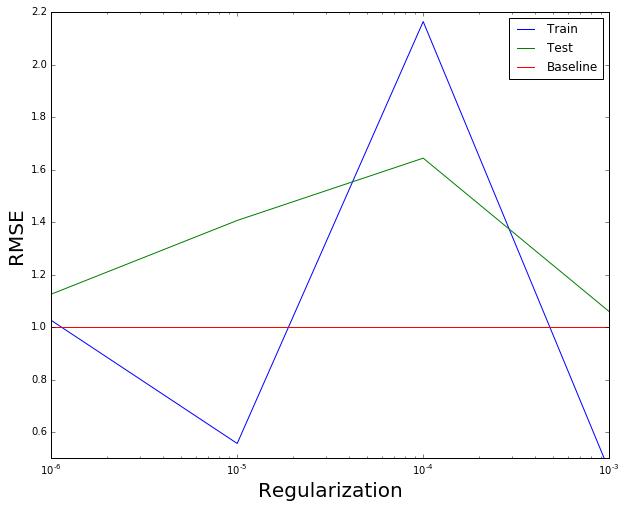

In [166]:
(fig, ax) = plt.subplots(figsize=(10, 8))
[p1, p2, p3] = ax.semilogx(regularization_vals, rmse_train2, 
                           regularization_vals, rmse_test2, 
                           regularization_vals, len(regularization_vals) * [1]
                           )
ax.set_ylim([0.5, 2.2])
ax.set_xlabel('Regularization', fontsize=20)
ax.set_ylabel('RMSE', fontsize=20)
ax.legend([p1, p2, p3], ["Train", "Test", "Baseline"])

Looks like we get the best Root Mean Squared Error (on the test set) when n_factors = 5 and regularization = 0.001. Let's use those parameters!

# Load a Larger Dataset

In [ ]:
data = graphlab.SFrame.read_csv("reviews.csv",column_type_hints={'overall':int})

In [170]:
data=data.join(booksdb,on='asin',how='inner')

In [171]:
# Create a new model, using the larger dataset, with the tuned parameters
Bestmodel= graphlab.factorization_recommender.create(data, 'reviewerID', 'title', 'overall', side_data_factorization=True,
                                                max_iterations=50, num_factors=5,
                                                regularization=0.001)

Recsys training: model = factorization_recommender

Preparing data set.

Data has 8896619 observations with 603553 users and 278816 items.

Data prepared in: 791.716s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 5        |

| regularization                 | L2 Regularization on Factors                     | 0.001    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-10    |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 1112077 / 8896619 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 0.00828207        | 0.822288                                 |

| 1       | 0.00414103        | 0.940707                                 |

| 2       | 0.00207052        | 1.02106                                  |

| 3       | 0.00103526        | 1.07095                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.00828207        | 0.822288                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 4.883ms      | 1.11863           | 1.05765               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 32.94s       | 3.38281           | 1.81984               | 0.00828207  |

| 2       | 55.68s       | 0.949131          | 0.949607              | 0.00828207  |

| 3       | 1m 18s       | 0.925478          | 0.945615              | 0.00828207  |

| 4       | 1m 40s       | 0.90896           | 0.94229               | 0.00828207  |

| 5       | 2m 2s        | 0.896339          | 0.939133              | 0.00828207  |

| 6       | 2m 26s       | 0.886869          | 0.936253              | 0.00828207  |

| 7       | 2m 48s       | 0.879063          | 0.933264              | 0.00828207  |

| 8       | 3m 10s       | 0.873278          | 0.930674              | 0.00828207  |

| 9       | 3m 33s       | 0.868672          | 0.927909              | 0.00828207  |

| 10      | 3m 55s       | 0.864344          | 0.925009              | 0.00828207  |

| 11      | 4m 18s       | 0.860517          | 0.922219              | 0.00828207  |

| 12      | 4m 41s       | 0.857894          | 0.920024              | 0.00828207  |

| 13      | 5m 3s        | 0.856065          | 0.918256              | 0.00828207  |

| 14      | 5m 26s       | 0.855436          | 0.917137              | 0.00828207  |

| 15      | 5m 49s       | 0.855645          | 0.916531              | 0.00828207  |

| 16      | 6m 11s       | 0.857686          | 0.916983              | 0.00828207  |

| 17      | 6m 34s       | 0.858902          | 0.917093              | 0.00828207  |

| 18      | 6m 56s       | 0.863216          | 0.918933              | 0.00828207  |

| 19      | 7m 19s       | 0.87101           | 0.922746              | 0.00828207  |

| 20      | 7m 41s       | 0.8629            | 0.917998              | 0.00828207  |

| 21      | 8m 4s        | 0.871324          | 0.922366              | 0.00828207  |

| 22      | 8m 27s       | 0.900054          | 0.937787              | 0.00828207  |

| 23      | 8m 49s       | 0.875823          | 0.924745              | 0.00828207  |

| 24      | 9m 12s       | 0.895938          | 0.935699              | 0.00828207  |

| 25      | 9m 34s       | 0.896556          | 0.9362                | 0.00828207  |

| 26      | 23m 43s      | 0.887078          | 0.931267              | 0.00828207  |

| 27      | 24m 14s      | 0.903179          | 0.939998              | 0.00828207  |

| 28      | 24m 37s      | 0.906623          | 0.941932              | 0.00828207  |

| 29      | 25m 1s       | 0.89165           | 0.934093              | 0.00828207  |

| 30      | 25m 28s      | 0.890073          | 0.933428              | 0.00828207  |

| 31      | 25m 57s      | 0.907345          | 0.942865              | 0.00828207  |

| 32      | 26m 21s      | 0.907482          | 0.943194              | 0.00828207  |

| 33      | 26m 44s      | 0.878476          | 0.927842              | 0.00828207  |

| 34      | 27m 6s       | 0.892304          | 0.935449              | 0.00828207  |

| 35      | 27m 29s      | 0.909549          | 0.944819              | 0.00828207  |

| 36      | 27m 51s      | 0.893538          | 0.936446              | 0.00828207  |

| 37      | 28m 14s      | 0.898813          | 0.939379              | 0.00828207  |

| 38      | 28m 37s      | 0.915098          | 0.948131              | 0.00828207  |

| 39      | 28m 59s      | 0.896042          | 0.93819               | 0.00828207  |

| 40      | 29m 22s      | 0.876191          | 0.927659              | 0.00828207  |

| 41      | 29m 44s      | 0.906509          | 0.944019              | 0.00828207  |

| 42      | 30m 7s       | 0.910469          | 0.946263              | 0.00828207  |

| 43      | 30m 29s      | 0.899128          | 0.940377              | 0.00828207  |

| 44      | 30m 51s      | 0.87842           | 0.929408              | 0.00828207  |

| 45      | 31m 14s      | 0.913199          | 0.948029              | 0.00828207  |

| 46      | 31m 36s      | 0.897596          | 0.939883              | 0.00828207  |

| 47      | 31m 59s      | 0.882529          | 0.931929              | 0.00828207  |

| 48      | 32m 21s      | 0.902028          | 0.942458              | 0.00828207  |

| 49      | 32m 44s      | 0.892676          | 0.937603              | 0.00828207  |

| 50      | 33m 6s       | 0.879148          | 0.930458              | 0.00828207  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.859026

Final training RMSE: 0.919582

In [172]:
SimilarI=Bestmodel.get_similar_items()

In [180]:
SimilarI.show()

Canvas is accessible via web browser at the URL: http://localhost:53821/index.html
Opening Canvas in default web browser.


In [179]:
view = Bestmodel.views.explore(item_data=data,item_name_column='title')
view.show()

Warning: The model was fit with 2 feature columns but only 1 were present during transform(). Proceeding with transform by ignoring the missing columns.

Warning: The model was fit with 2 feature columns but only 1 were present during transform(). Proceeding with transform by ignoring the missing columns.

View object

URI: 		http://localhost:32212/view/fa2c44d8-db5d-443d-b48a-63f0e1064bc3
HTML: 		
<gl-recommender-explore
    uri="http://localhost:32212/view/f3a21a2e-4df3-49c9-9ed0-d47721cc402c"
    api_key=""
/>
        

In [173]:
rankingmodel=graphlab.ranking_factorization_recommender.create(data, 'reviewerID', 'title', 'overall', side_data_factorization=True,
                                                max_iterations=50, num_factors=5,
                                                regularization=0.001)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 8896619 observations with 603553 users and 278816 items.

Data prepared in: 1738.95s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 5        |

| regularization                 | L2 Regularization on Factors                     | 0.001    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 1112077 / 8896619 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 0.00828207        | 1.68525                                  |

| 1       | 0.00414103        | 1.74341                                  |

| 2       | 0.00207052        | 1.82958                                  |

| 3       | 0.00103526        | 1.88278                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.00828207        | 1.68525                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 1.801ms      | 2.19368           | 1.05765               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 58.31s       | 1.88548           | 1.08689               | 0.00828207  |

| 2       | 24m 15s      | 1.68755           | 1.03573               | 0.00828207  |

| 3       | 25m 13s      | 1.64489           | 1.01753               | 0.00828207  |

| 4       | 26m 11s      | 1.61922           | 1.00603               | 0.00828207  |

| 5       | 27m 9s       | 1.60061           | 0.997592              | 0.00828207  |

| 6       | 28m 6s       | 1.58703           | 0.991778              | 0.00828207  |

| 7       | 29m 4s       | 1.5749            | 0.98703               | 0.00828207  |

| 8       | 30m 2s       | 1.56531           | 0.982807              | 0.00828207  |

| 9       | 31m 0s       | 1.55683           | 0.979138              | 0.00828207  |

| 10      | 31m 57s      | 1.54943           | 0.975979              | 0.00828207  |

| 11      | 32m 55s      | 1.54312           | 0.973064              | 0.00828207  |

| 12      | 33m 53s      | 1.53755           | 0.970591              | 0.00828207  |

| 13      | 53m 20s      | 1.53263           | 0.969322              | 0.00828207  |

| 14      | 54m 18s      | 1.52807           | 0.967069              | 0.00828207  |

| 15      | 55m 16s      | 1.52383           | 0.965421              | 0.00828207  |

| 16      | 56m 13s      | 1.51992           | 0.963149              | 0.00828207  |

| 17      | 57m 11s      | 1.51624           | 0.961989              | 0.00828207  |

| 18      | 58m 8s       | 1.51275           | 0.960714              | 0.00828207  |

| 19      | 59m 6s       | 1.50929           | 0.959006              | 0.00828207  |

| 20      | 1h 0m        | 1.50622           | 0.957759              | 0.00828207  |

| 21      | 1h 1m        | 1.50311           | 0.956528              | 0.00828207  |

| 22      | 1h 1m        | 1.50016           | 0.955061              | 0.00828207  |

| 23      | 1h 2m        | 1.49736           | 0.954358              | 0.00828207  |

| 24      | 1h 8m        | 1.49459           | 0.953011              | 0.00828207  |

| 25      | 1h 9m        | 1.49185           | 0.951235              | 0.00828207  |

| 26      | 1h 10m       | 1.48927           | 0.951176              | 0.00828207  |

| 27      | 1h 11m       | 1.48676           | 0.949552              | 0.00828207  |

| 28      | 1h 12m       | 1.48437           | 0.948928              | 0.00828207  |

| 29      | 1h 13m       | 1.48206           | 0.947078              | 0.00828207  |

| 30      | 1h 14m       | 1.47978           | 0.946506              | 0.00828207  |

| 31      | 1h 15m       | 1.47763           | 0.946006              | 0.00828207  |

| 32      | 1h 16m       | 1.47545           | 0.944736              | 0.00828207  |

| 33      | 1h 17m       | 1.47334           | 0.944021              | 0.00828207  |

| 34      | 1h 18m       | 1.47126           | 0.94275               | 0.00828207  |

| 35      | 1h 26m       | 1.46939           | 0.941843              | 0.00828207  |

| 36      | 1h 27m       | 1.46751           | 0.941968              | 0.00828207  |

| 37      | 1h 28m       | 1.46556           | 0.940246              | 0.00828207  |

| 38      | 1h 29m       | 1.46376           | 0.939971              | 0.00828207  |

| 39      | 1h 30m       | 1.46205           | 0.939327              | 0.00828207  |

| 40      | 1h 31m       | 1.46032           | 0.93798               | 0.00828207  |

| 41      | 1h 32m       | 1.45863           | 0.937306              | 0.00828207  |

| 42      | 1h 33m       | 1.45689           | 0.937293              | 0.00828207  |

| 43      | 1h 34m       | 1.45528           | 0.935578              | 0.00828207  |

| 44      | 1h 35m       | 1.45357           | 0.935777              | 0.00828207  |

| 45      | 1h 36m       | 1.45203           | 0.934318              | 0.00828207  |

| 46      | 1h 37m       | 1.45052           | 0.934284              | 0.00828207  |

| 47      | 1h 38m       | 1.4489            | 0.932784              | 0.00828207  |

| 48      | 1h 39m       | 1.44762           | 0.933462              | 0.00828207  |

| 49      | 1h 40m       | 1.44606           | 0.931814              | 0.00828207  |

| 50      | 1h 41m       | 1.44464           | 0.931743              | 0.00828207  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 1.44353

Final training RMSE: 0.927916

In [178]:
RSimilarI=rankingmodel.get_similar_items()

In [ ]:
RSimilarI.show()

In [124]:
Bestmodel.save('bestmodel')

# Conclusion:

In [177]:
model_comp = graphlab.compare(test, [model0, model1])

PROGRESS: Evaluate model M0


recommendations finished on 1000/9219 queries. users per second: 20877.3

recommendations finished on 2000/9219 queries. users per second: 24038.8

recommendations finished on 3000/9219 queries. users per second: 23828.4

recommendations finished on 4000/9219 queries. users per second: 22722.4

recommendations finished on 5000/9219 queries. users per second: 21716.6

recommendations finished on 6000/9219 queries. users per second: 20749.6

recommendations finished on 7000/9219 queries. users per second: 20793.8

recommendations finished on 8000/9219 queries. users per second: 21062.8

recommendations finished on 9000/9219 queries. users per second: 21257.9


Precision and recall summary statistics by cutoff
+--------+-------------------+-------------------+
| cutoff |   mean_precision  |    mean_recall    |
+--------+-------------------+-------------------+
|   1    |  0.00043388653867 | 0.000379650721336 |
|   2    | 0.000379650721336 | 0.000564052500271 |
|   3    | 0.000253100480891 | 0.000564052500271 |
|   4    | 0.000216943269335 | 0.000672524134939 |
|   5    | 0.000173554615468 | 0.000672524134939 |
|   6    | 0.000271179086669 |  0.00143182557761 |
|   7    | 0.000247935164954 |  0.00148606139495 |
|   8    | 0.000230502223669 |  0.00159453302961 |
|   9    | 0.000216943269335 |  0.00170300466428 |
|   10   | 0.000206096105868 |  0.00181147629895 |
+--------+-------------------+-------------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1


recommendations finished on 1000/9219 queries. users per second: 10152.6

recommendations finished on 2000/9219 queries. users per second: 11662.4

recommendations finished on 3000/9219 queries. users per second: 11826.5

recommendations finished on 4000/9219 queries. users per second: 11985.5

recommendations finished on 5000/9219 queries. users per second: 12087.8

recommendations finished on 6000/9219 queries. users per second: 12066.9

recommendations finished on 7000/9219 queries. users per second: 12226.2

recommendations finished on 8000/9219 queries. users per second: 12307.1

recommendations finished on 9000/9219 queries. users per second: 12164.7


Precision and recall summary statistics by cutoff
+--------+------------------+-----------------+
| cutoff |  mean_precision  |   mean_recall   |
+--------+------------------+-----------------+
|   1    |  0.035578696171  | 0.0341414470116 |
|   2    | 0.0185486495281  | 0.0354792638392 |
|   3    |  0.015547600969  | 0.0443016234588 |
|   4    | 0.0125013558954  | 0.0474111436526 |
|   5    | 0.0104783599089  | 0.0495534584373 |
|   6    | 0.00938279639874 |  0.053172795314 |
|   7    | 0.00818186044349 | 0.0540948042087 |
|   8    | 0.00785063455906 | 0.0592282243193 |
|   9    | 0.00723144231117 | 0.0612530281665 |
|   10   | 0.00663846404165 | 0.0623739017247 |
+--------+------------------+-----------------+
[10 rows x 3 columns]

Model compare metric: precision_recall


Including side features and using the matrix factorization method was better with lower RMSE higher precision/recall. the ranking matrix factorization had the lowest RMSE.

It was clear from the above that there are model differences and its in our best interest to look for the best systems.

References:

https://turi.com/learn/
    
https://github.com/turi-code/userguide/blob/master/recommender/making-recommendations.md

https://www.youtube.com/watch?v=hD0_Gh0wA9Q